In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.style.use('dark_background')
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
from collections import Counter

In [23]:
data = pd.read_csv('arxiv_papers.csv')

In [24]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,NaN,"['Galaxies (573)', 'Astronomy image processing...",2025-01-03
1,Hunting for the candidates of Changing-Look Bl...,The changing-look blazars (CLBs) are the blaza...,"['Shi-Ju Kang', 'Shan-Shan Ren', 'Yong-Gang Zh...",7.0,13.0,3.0,arxiv.org/pdf/2501.00094,High Energy Astrophysical Phenomena,NaN,ApJ,NaN,['Active galactic nuclei (16) – Blazars (164) ...,2025-01-03
2,First unambiguous detection of ammonia in the ...,The newly accessible mid-infrared (MIR) window...,"['Mathilde Mâlin', 'Anthony Boccaletti', 'Clém...",6.0,18.0,4.0,arxiv.org/pdf/2501.00104,Earth and Planetary Astrophysics,NaN,A&A,NaN,"['Planetary systems', 'Stars: individual: GJ 5...",2025-01-03
3,Exchange of meteorites between the terrestrial...,The evolution of the orbits of bodies ejected ...,['S.I. Ipatov'],0.0,6.0,0.0,arxiv.org/pdf/2501.00134,Earth and Planetary Astrophysics,NaN,NaN,Modern astronomy: from the Early Universe to e...,['planets and satellites: terrestrial planets'],2025-01-03
4,Autoencoder Reconstruction of Cosmological Mic...,Enhanced modeling of microlensing variations i...,"['Somayeh Khakpash', 'Federica Bianco', 'Georg...",11.0,18.0,1.0,arxiv.org/pdf/2501.00153,Instrumentation and Methods for Astrophysics,NaN,The Astrophysical Journal,NaN,['- Interdisciplinary astronomy(804) 1'],2025-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5558,exoALMA. VI. Rotating under Pressure: Rotation...,The bulk motion of the gas in protoplanetary d...,"['Jochen Stadler', 'Myriam Benisty', 'Andrew J...",19.0,37.0,3.0,arxiv.org/pdf/2504.20036,Earth and Planetary Astrophysics,NaN,NaN,NaN,['Protoplanetary disks (1300) — Planet formati...,2025-04-29
5559,Polarization of light from fast rotating Wolf-...,Fast-rotating Wolf-Rayet (WR) stars are potent...,"['Slah Abdellaoui', 'Jiří Krtička', 'Brankica ...",6.0,6.0,1.0,arxiv.org/pdf/2504.20037,Solar and Stellar Astrophysics,['High Energy Astrophysical Phenomena'],NaN,NaN,"['outflows– numerical method 1', 'stars: Wolf-...",2025-04-29
5560,Unified and consistent structure growth measur...,We present the tightest cosmic microwave backg...,"['Frank J. Qu', 'Fei Ge', 'W. L. Kimmy Wu', 'I...",6.0,9.0,0.0,arxiv.org/pdf/2504.20038,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,[],2025-04-29
5561,Starlight from JWST: Implications for star for...,We confront the star formation rate in differe...,"['John Ellis', 'Malcolm Fairbairn', 'Juan Urru...",11.0,15.0,3.0,arxiv.org/pdf/2504.20043,Cosmology and Nongalactic Astrophysics,"['Astrophysics of Galaxies', 'High Energy Phys...",NaN,NaN,[],2025-04-29


In [25]:
authors = data['authors'].tolist()
# Flatten the list of authors and count occurrences
all_authors = [author for sublist in authors for author in sublist.split(', ')]
author_counts = Counter(all_authors)

# Find the most common author
most_common_author, count = author_counts.most_common(1)[0]
print(f"The most repeated author is {most_common_author} and they were repeated {count} times.")

# Find the second most common author
second_most_common_author, count = author_counts.most_common(2)[1]
print(f"The second most repeated author is {second_most_common_author} and they were repeated {count} times.")

The most repeated author is 'J. Carretero' and they were repeated 69 times.
The second most repeated author is 'S. Bardelli' and they were repeated 56 times.


In [26]:
primary_subjects = data['primary_subject'].tolist()
# Flatten the list of primary subjects and count occurrences
all_primary_subjects = [subject for sublist in primary_subjects for subject in sublist.split(', ')]
primary_subject_counts = Counter(all_primary_subjects)

# Find the most common primary subject
most_common_primary_subject, count = primary_subject_counts.most_common(1)[0]
print(f"The most repeated primary subject is {most_common_primary_subject} and it was repeated {count} times.")

# Find the 2nd most common primary subject
most_common_primary_subject_2, count = primary_subject_counts.most_common(2)[1]
print(f"The second most repeated primary subject is {most_common_primary_subject_2} and it was repeated {count} times.")

The most repeated primary subject is Astrophysics of Galaxies and it was repeated 1500 times.
The second most repeated primary subject is High Energy Astrophysical Phenomena and it was repeated 1141 times.


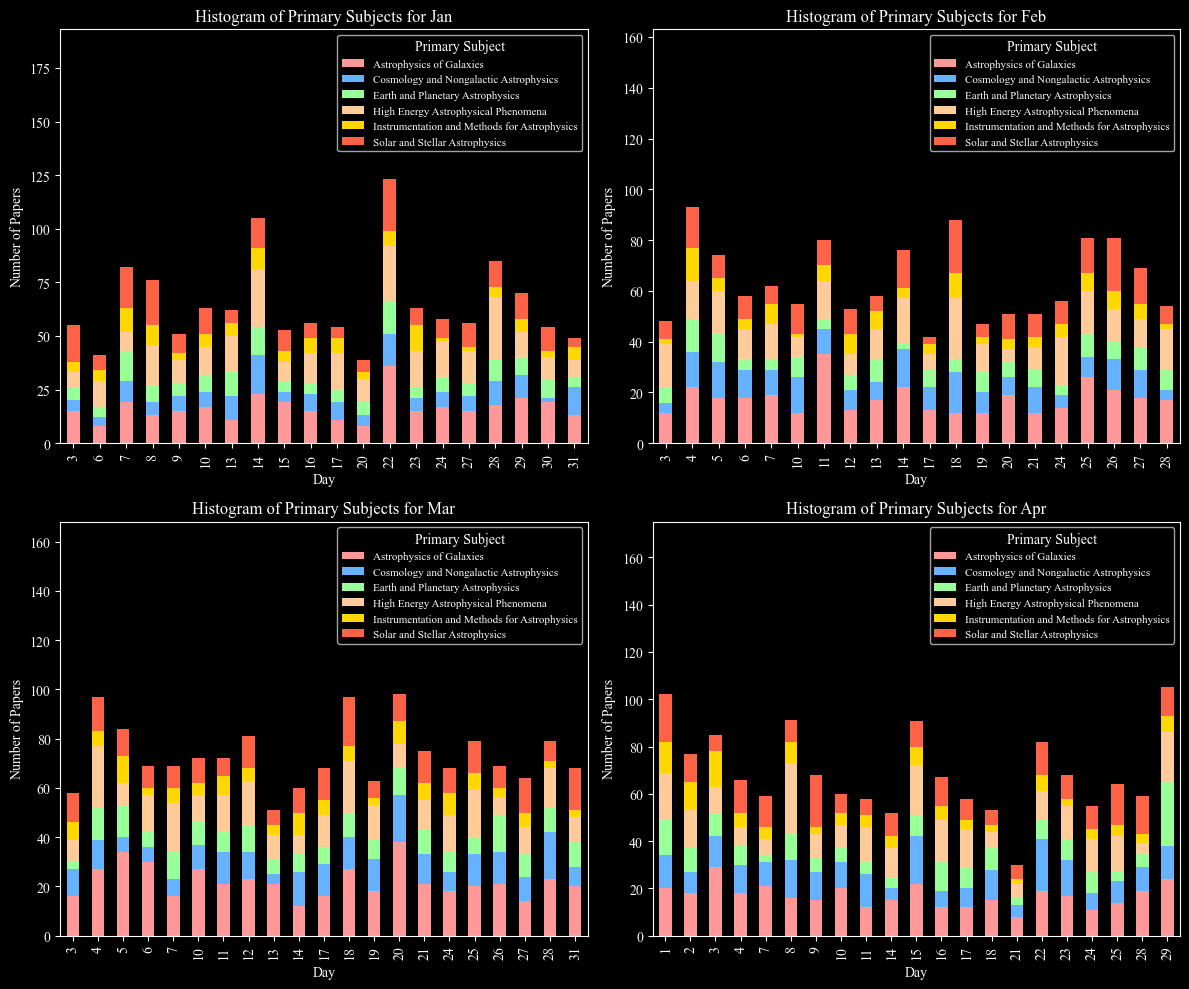

In [27]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.strftime('%b')

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347']

num_unique_months = data['month'].nunique()
list_unique_months = data['month'].unique()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i in range(num_unique_months):
    ax = axs[i // 2, i % 2]
    masked_data = data[data['month'] == list_unique_months[i]]
    subject_counts_per_day = masked_data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)
    subject_counts_per_day.plot(kind='bar', stacked=True, ax=ax, color=colors)
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Papers')
    ax.set_ylim(0, max(subject_counts_per_day.sum(axis=1)) + 70)
    ax.set_title(f'Histogram of Primary Subjects for {list_unique_months[i]}')
    ax.legend(title='Primary Subject', fontsize = 8, loc = 'upper right')

plt.tight_layout()
plt.show()


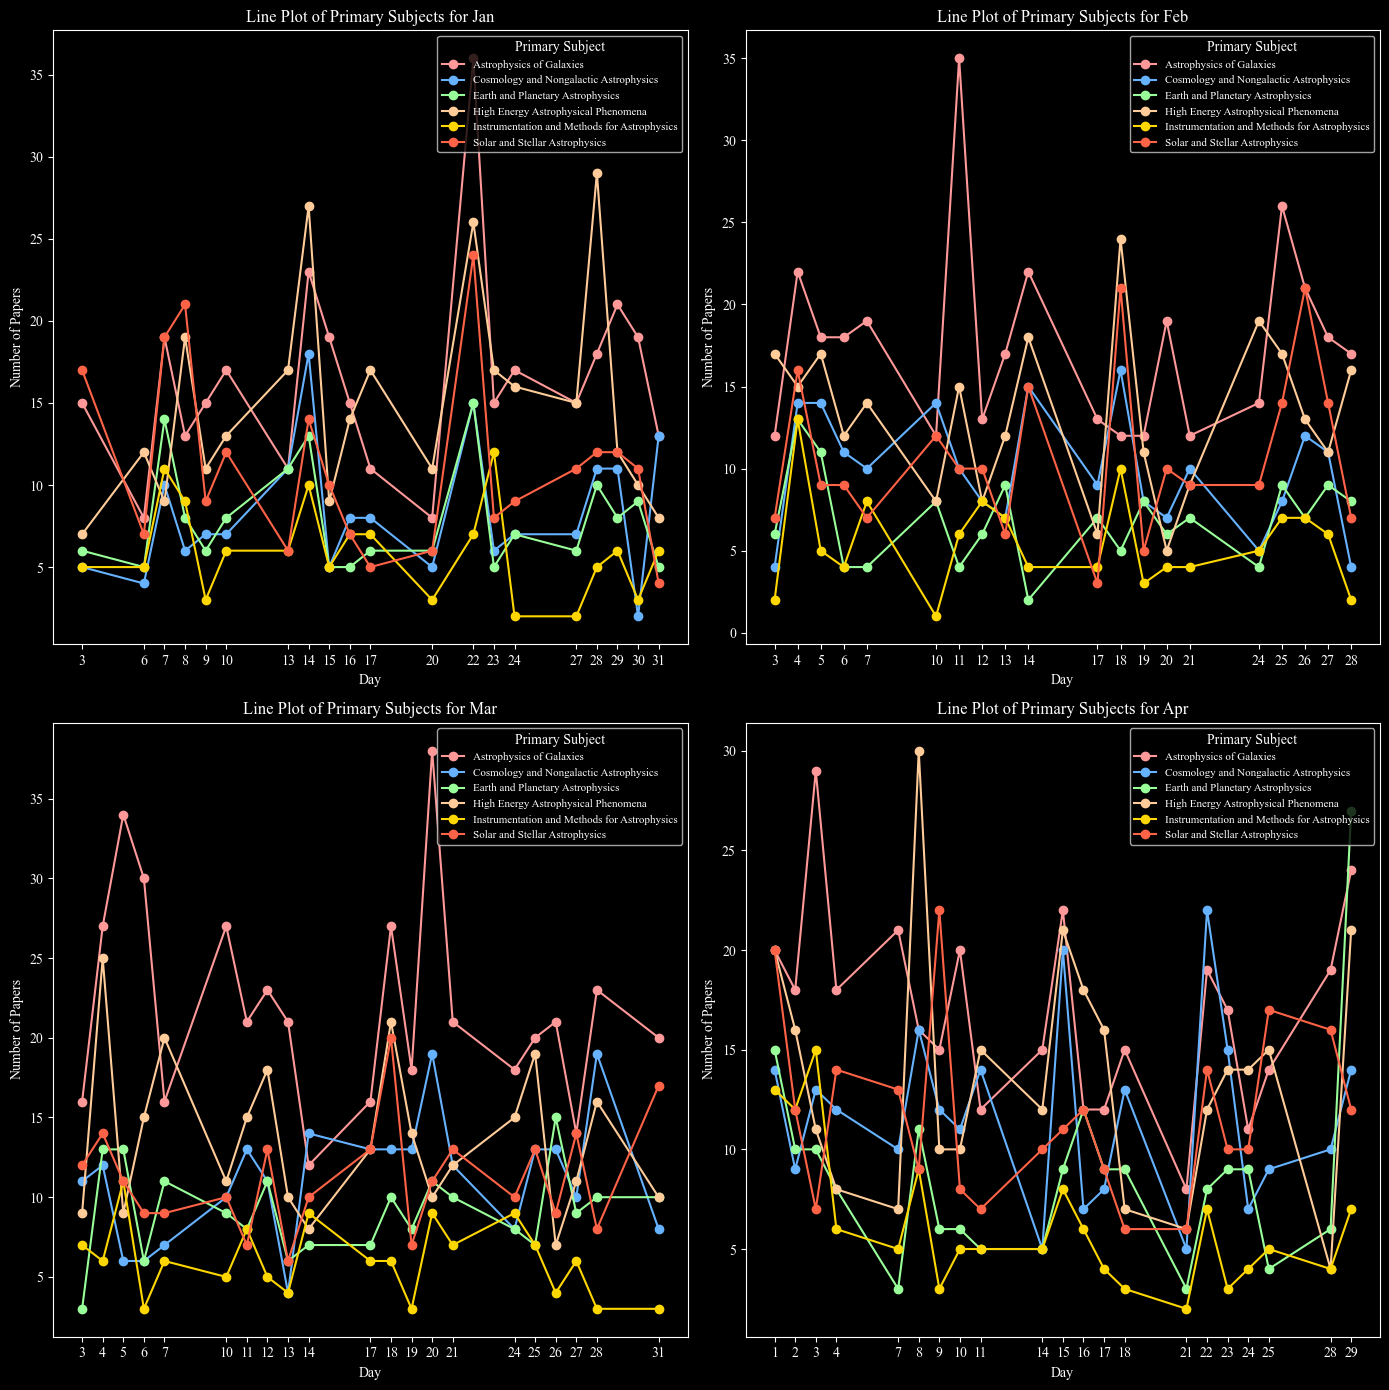

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for i, month in enumerate(list_unique_months):
    ax = axs[i // 2, i % 2]
    masked_data = data[data['month'] == month]
    subject_counts_per_day = masked_data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)
    for j, subject in enumerate(subject_counts_per_day.columns):
        ax.plot(subject_counts_per_day.index, subject_counts_per_day[subject], color=colors[j], label=subject, marker='o')
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Papers')
    ax.set_title(f'Line Plot of Primary Subjects for {month}')
    xticks_labels = [f"{day}" for day in subject_counts_per_day.index]
    ax.set_xticks(subject_counts_per_day.index)
    ax.set_xticklabels(xticks_labels, rotation=0)
    ax.legend(title='Primary Subject', fontsize=8, loc='upper right')

plt.tight_layout()
plt.show()

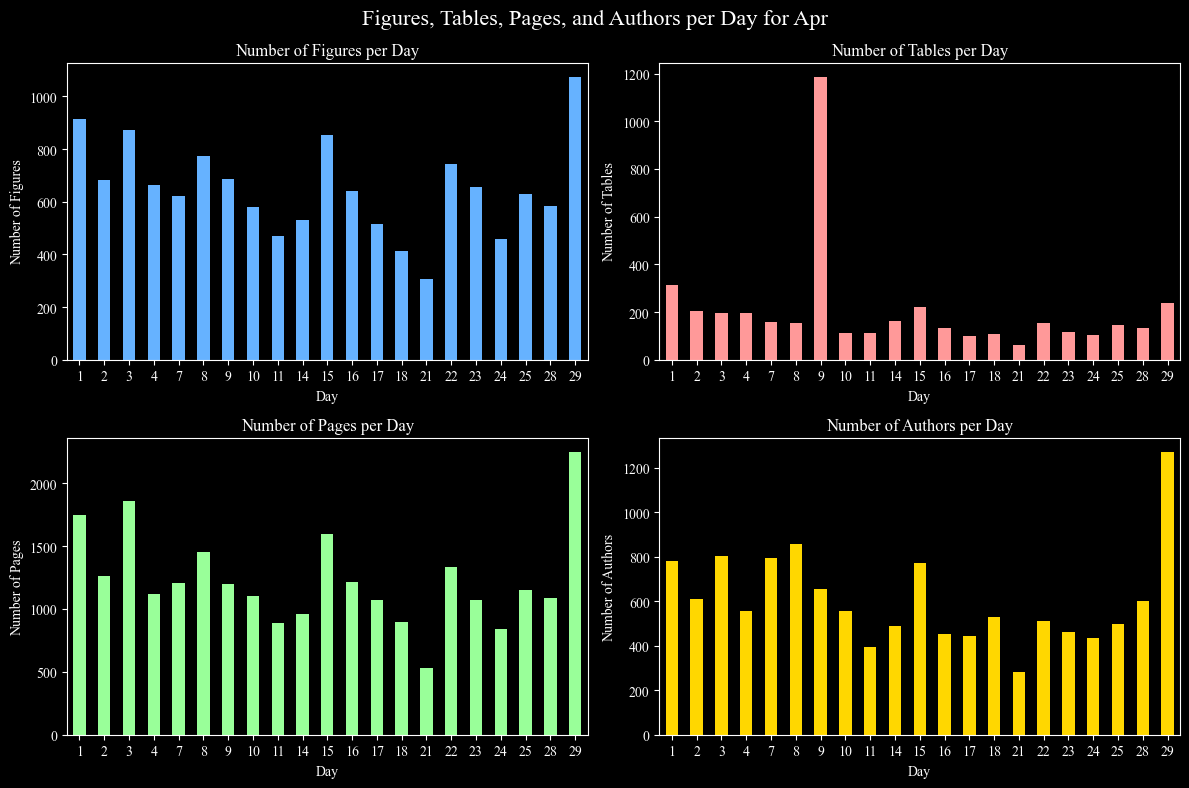

In [29]:

i = 3 # Month Number
masked_data = data[data['month'] == list_unique_months[i]]

figures_per_day = masked_data.groupby('day')['figures'].sum()
tables_per_day = masked_data.groupby('day')['tables'].sum()
pages_per_day = masked_data.groupby('day')['pages'].sum()
authors_per_day = masked_data.groupby('day')['authors'].apply(lambda x: x.str.split(', ').str.len().sum())

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_day.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Number of Figures')
ax[0, 0].set_title('Number of Figures per Day')
ax[0, 0].set_xticks(range(len(figures_per_day)))
ax[0, 0].set_xticklabels(figures_per_day.index, rotation=0)

tables_per_day.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Number of Tables')
ax[0, 1].set_title('Number of Tables per Day')
ax[0, 1].set_xticks(range(len(tables_per_day)))
ax[0, 1].set_xticklabels(tables_per_day.index, rotation=0)

pages_per_day.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Number of Pages')
ax[1, 0].set_title('Number of Pages per Day')
ax[1, 0].set_xticks(range(len(pages_per_day)))
ax[1, 0].set_xticklabels(pages_per_day.index, rotation=0)

authors_per_day.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Number of Authors')
ax[1, 1].set_title('Number of Authors per Day')
ax[1, 1].set_xticks(range(len(authors_per_day)))
ax[1, 1].set_xticklabels(authors_per_day.index, rotation=0)

plt.suptitle(f'Figures, Tables, Pages, and Authors per Day for {list_unique_months[i]}', fontsize=16)
plt.tight_layout()
plt.show()


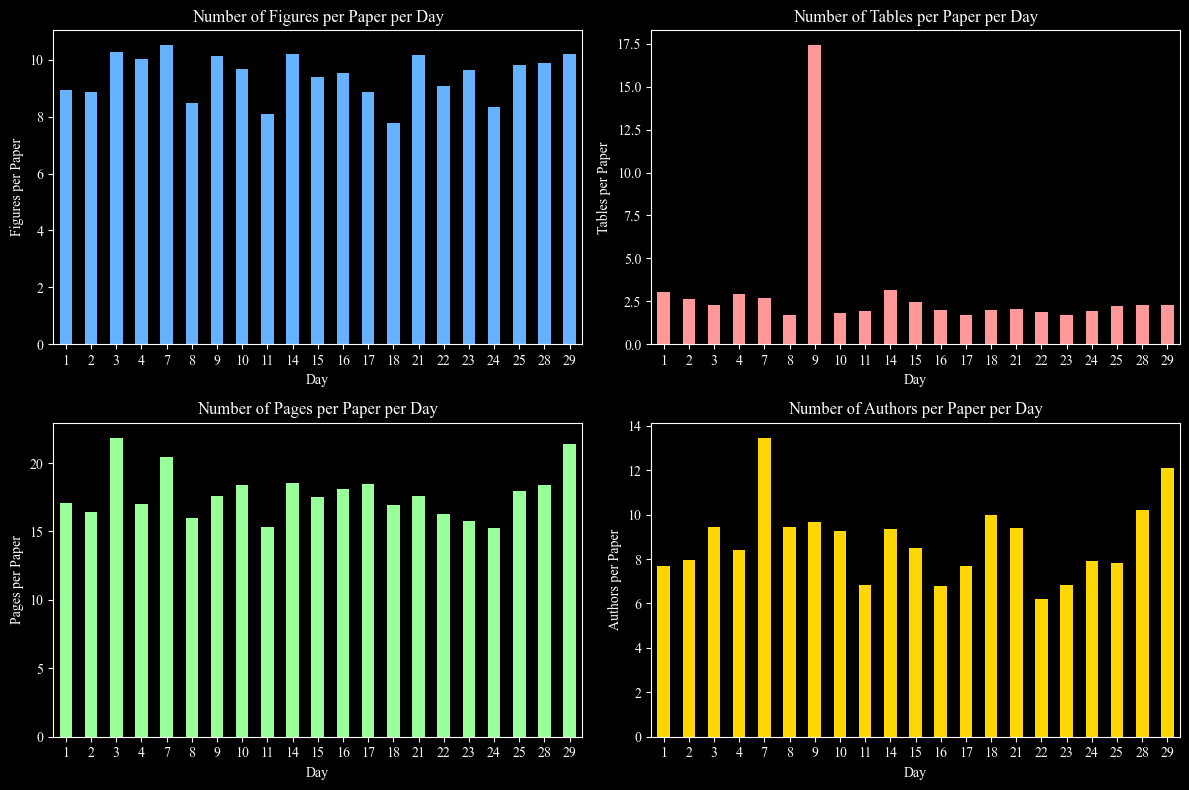

In [30]:
masked_data = data[data['month'] == list_unique_months[i]]

papers_per_day = masked_data.groupby('day').size()

figures_per_paper = figures_per_day / papers_per_day
tables_per_paper = tables_per_day / papers_per_day
pages_per_paper = pages_per_day / papers_per_day
authors_per_paper = authors_per_day / papers_per_day

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_paper.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Figures per Paper')
ax[0, 0].set_title('Number of Figures per Paper per Day')
ax[0, 0].set_xticks(range(len(figures_per_paper)))
ax[0, 0].set_xticklabels(figures_per_paper.index, rotation=0)

tables_per_paper.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Tables per Paper')
ax[0, 1].set_title('Number of Tables per Paper per Day')
ax[0, 1].set_xticks(range(len(tables_per_paper)))
ax[0, 1].set_xticklabels(tables_per_paper.index, rotation=0)

pages_per_paper.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Pages per Paper')
ax[1, 0].set_title('Number of Pages per Paper per Day')
ax[1, 0].set_xticks(range(len(pages_per_paper)))
ax[1, 0].set_xticklabels(pages_per_paper.index, rotation=0)

authors_per_paper.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Authors per Paper')
ax[1, 1].set_title('Number of Authors per Paper per Day')
ax[1, 1].set_xticks(range(len(authors_per_paper)))
ax[1, 1].set_xticklabels(authors_per_paper.index, rotation=0)

plt.tight_layout()
plt.show()


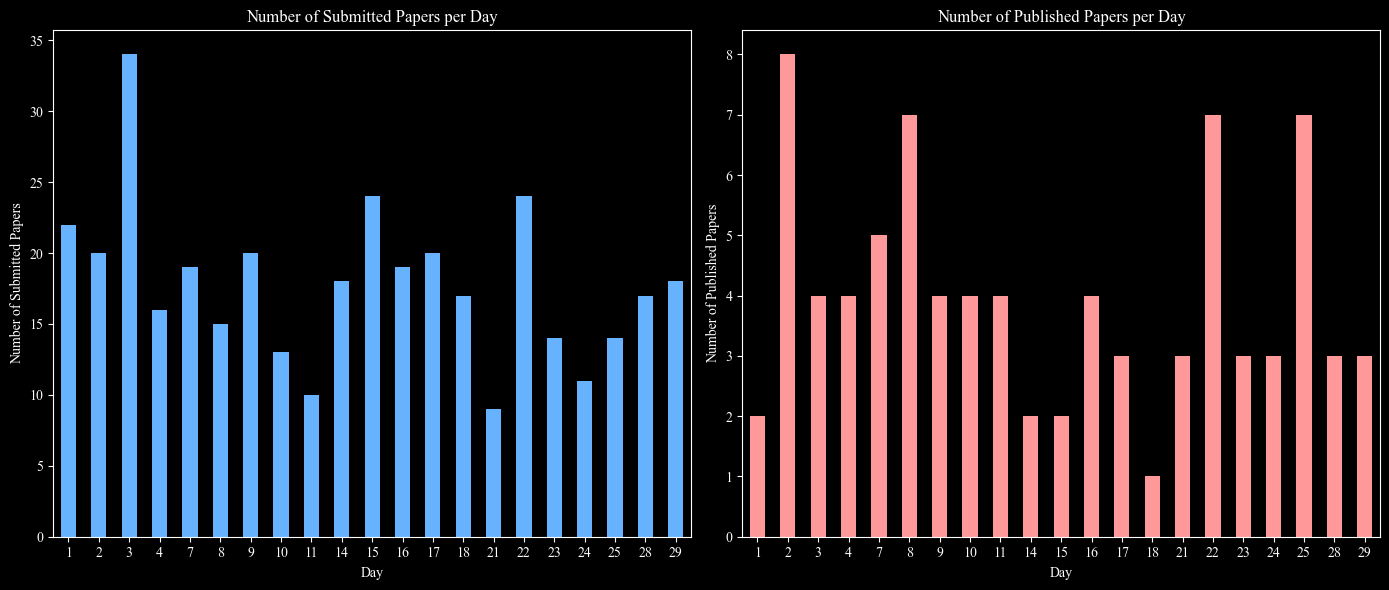

In [31]:
masked_data = data[data['month'] == list_unique_months[i]]
submitted_papers_per_day = masked_data.groupby('day')['submitted_journal'].count()
published_papers_per_day = masked_data.groupby('day')['published_journal'].count()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

submitted_papers_per_day.plot(kind='bar', ax=ax[0], color='#66B2FF')
ax[0].set_xlabel('Day')
ax[0].set_ylabel('Number of Submitted Papers')
ax[0].set_title('Number of Submitted Papers per Day')
ax[0].set_xticks(range(len(submitted_papers_per_day)))
ax[0].set_xticklabels(submitted_papers_per_day.index, rotation=0)

published_papers_per_day.plot(kind='bar', ax=ax[1], color='#FF9999')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Number of Published Papers')
ax[1].set_title('Number of Published Papers per Day')
ax[1].set_xticks(range(len(published_papers_per_day)))
ax[1].set_xticklabels(published_papers_per_day.index, rotation=0)

plt.tight_layout()
plt.show()

In [32]:
keywords = data['keywords'].tolist()

# Flatten the list of keywords and count occurrences
all_keywords = [keyword for sublist in keywords for keyword in sublist.split(', ')]
keyword_counts = Counter(all_keywords)

# Find the most common keyword
most_common_keyword, count = keyword_counts.most_common(1)[0]
print(f"The most repeated keyword is {most_common_keyword} and it was repeated {count} times.")

# Second most common keyword
second_most_common_keyword, count = keyword_counts.most_common(2)[1]
print(f"The second most repeated keyword is {second_most_common_keyword} and it was repeated {count} times.")


The most repeated keyword is [] and it was repeated 1581 times.
The second most repeated keyword is 'accretion'] and it was repeated 27 times.


In [33]:
# Find the author papers
author = 'Jose'
papers = data[data['authors'].str.contains(author)]
papers


,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date,day,month
20,A Novel Survey for Young Substellar Objects wi...,We present a study of very low-mass stars and ...,"['Tanvi Sharma', 'Wen-Ping Chen', 'Beth Biller...",35.0,25.0,4.0,arxiv.org/pdf/2501.00433,Solar and Stellar Astrophysics,['Astrophysics of Galaxies'],The Astrophysical Journal,NaN,[],2025-01-03,3,Jan
58,A Near-IR Search for Helium in the Superlumino...,"We present a detailed study of SN 2024ahr, a h...","['Harsh Kumar', 'Edo Berger', 'Peter K. Blanch...",7.0,20.0,2.0,arxiv.org/pdf/2501.01485,High Energy Astrophysical Phenomena,"['Astrophysics of Galaxies', 'Solar and Stella...",NaN,NaN,['Supernovae() — Optical astronomy() — Transie...,2025-01-06,6,Jan
67,An Integral Field Unit for the Binospec Spectr...,Binospec is a wide-field optical (360 to 1000 ...,"['Daniel Fabricant', 'Sagi Ben-Ami', 'Igor Chi...",11.0,12.0,1.0,arxiv.org/pdf/2501.01528,Instrumentation and Methods for Astrophysics,NaN,PASP,NaN,"['Spectroscopy — Astronomical Optics 1', 'are ...",2025-01-06,6,Jan
96,Sporadic Dips from Extended Debris Transiting ...,We present the discovery of deep but sporadic ...,"['J. J. Hermes', 'Joseph A. Guidry', 'Zachary ...",5.0,13.0,5.0,arxiv.org/pdf/2501.02050,Solar and Stellar Astrophysics,['Earth and Planetary Astrophysics'],NaN,NaN,['White dwarf stars (1799) — Transits (1711) —...,2025-01-07,7,Jan
104,Effects of Galaxy Cluster Structure on Lensed ...,Strong gravitational lenses come in many forms...,"['Luka Vujeva', 'Jose María Ezquiaga', 'Rico K...",10.0,13.0,0.0,arxiv.org/pdf/2501.02096,Cosmology and Nongalactic Astrophysics,['General Relativity and Quantum Cosmology'],NaN,NaN,[],2025-01-07,7,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,"A local, topology-independent parameterization...",Lyman-$\alpha$ damping wings towards quasars p...,"['Timo Kist', 'Joseph F. Hennawi', 'Frederick ...",10.0,19.0,0.0,arxiv.org/pdf/2504.14746,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],MNRAS,NaN,['intergalactic medium – quasars: absorption l...,2025-04-22,22,Apr
5212,A Mission to Demonstrate Rapid-Response Flyby ...,International and U.S. strategies and protocol...,"['Nancy L. Chabot', 'Justin A. Atchison', 'Ryl...",5.0,9.0,1.0,arxiv.org/pdf/2504.15321,Instrumentation and Methods for Astrophysics,['Earth and Planetary Astrophysics'],NaN,IAF Symposium on Planetary Defense and Near-Ea...,"['Flyby', 'Asteroid', '(Planetary Defense', 'S...",2025-04-23,23,Apr
5242,Lunar impact ejecta flux on the Earth,The transfer of material between planetary bod...,"['Jose Daniel Castro-Cisneros', 'Renu Malhotra...",8.0,12.0,1.0,arxiv.org/pdf/2504.15502,Earth and Planetary Astrophysics,NaN,NaN,NaN,['Dynamics Near-Earth asteroids MoonABSTRACT T...,2025-04-23,23,Apr
5260,Line Intensity Mapping Prediction from the Cos...,"The evolution of large-scale structure, galaxi...","['Eugene Hyeonmin Lee', 'Joohyun Lee', 'Paul R...",1.0,4.0,0.0,arxiv.org/pdf/2504.15821,Astrophysics of Galaxies,['Cosmology and Nongalactic Astrophysics'],NaN,NaN,['Reionization (1383) — Line intensities (2084...,2025-04-23,23,Apr
